# Exploration Data Analysis
## Centralització en l'atribut ICT

Paleta de colors utilitzada: https://coolors.co/palette/ef476f-ffd166-06d6a0-118ab2-073b4c

ICT correspon a #118AB2

In [1]:
# dependencies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
dataset = pd.read_csv('all_scenarios.csv')

#### Correlation
***


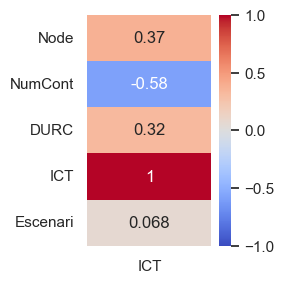

In [2]:
# aquest heatmap mostra la correlació lineal entre els diferents atributs de les dades i l'ICT
plt.figure(figsize=(2,3)) 
sns.heatmap(dataset.corr()[['ICT']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

#### Deep analysis
***

In [3]:
# declarem l'escenari com a categoria per als plots
dataset["Escenari"] = dataset["Escenari"].astype('category')

In [4]:
dataset[["ICT"]].describe()

# Veiem que la majoria de valors es troben per sota de 2000. Tot i això, el valor més alt és 9610, unes 5 vegades més
# que el valor del percentil. Cal mirar la distribució de valors de l'atribut i assegurar-se que els valors més alts 
# no representen una discòrdia a l'hora de classificar

,ICT
count,24228.000000
mean,1313.734008
std,733.954600
min,0.000000
25%,757.052523
50%,1245.348981
75%,1816.761744
max,9610.000000


In [5]:
dataset[dataset["ICT"] > 1816].shape  # Existeixen 6069 nodes per sobre del percentil 75

(6069, 5)

In [6]:
dataset[["ICT"]].quantile(0.975)  

# Veiem que el percentil 97.5 es troba quelcom aprop de la resta de la distribució. Sembla, però, que les dades comencen
# a diluir-se i cada cop hi ha més espai entre mostres

ICT    2836.091504
Name: 0.975, dtype: float64

In [8]:
dataset[dataset["ICT"] > dataset[["ICT"]].quantile(0.99)["ICT"]]["ICT"].describe()  

# Busquem els outliers que es troben entre en l'últim percentil

# Veiem que la majoria (percentil 75) d'aquests outliers es troba per sota de 3450. Això suporta la teoria que es
# tracta d'una cua que resembla una asimptota.

count     243.000000
mean     3422.659920
std       634.325133
min      3032.842517
25%      3114.515110
50%      3235.450000
75%      3450.390569
max      9610.000000
Name: ICT, dtype: float64

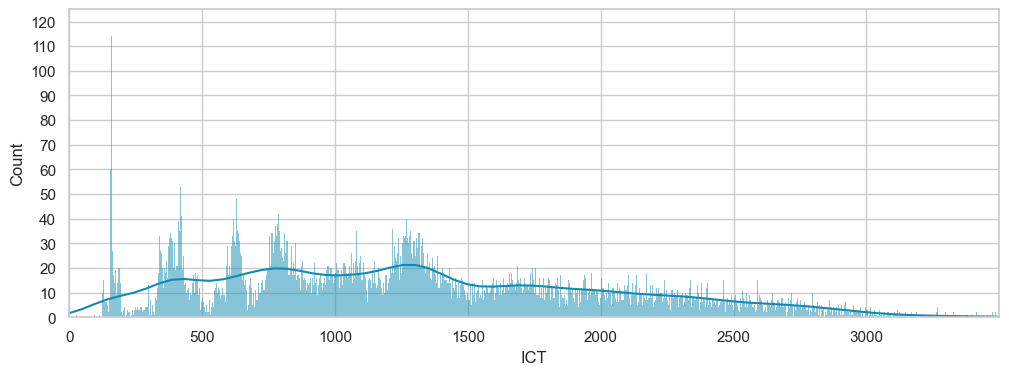

In [9]:
plt.figure(figsize=(12,4)) 
sns.histplot(data=dataset, x="ICT", kde=True, color="#118AB2", binwidth=1.5)
ax = plt.gca()
ax.set_xticks([i for i in range(0, 3500, 500)])  
ax.set_yticks([i for i in range(0, 125, 10)])
ax.set_xlim(0, 3500)
ax.set_ylim(0, 125)
plt.show()

# Donada l'extensió dels valors, utilitzem com a referencia el percentil 75 del percentil 99 calculat anteriorment
# per a obtenir un gràfic que permet veure amb detall la distribució

# Es tracta d'una distribució amb cinc congregacions de valors notables. Possiblement permeti separar escenaris entre
# grans grups semblants. L'únic problema que es presenta ara és la magnitud de les dades.

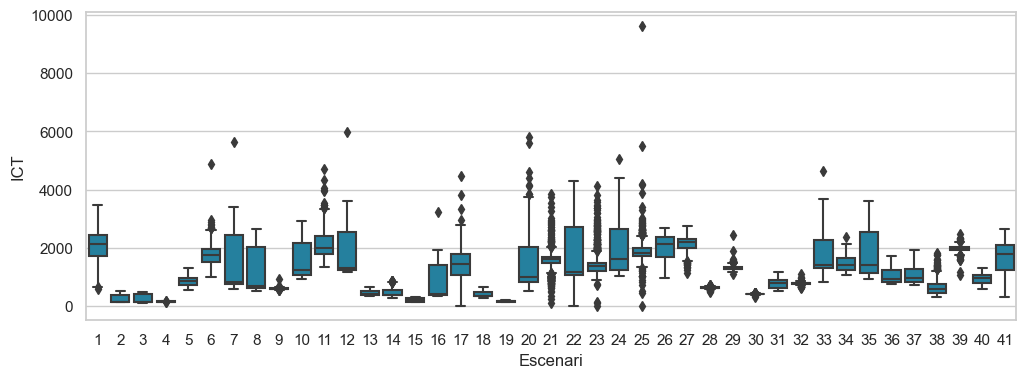

In [10]:
plt.figure(figsize=(12,4)) 
sns.boxplot(data=dataset, x="Escenari", y="ICT", color="#118AB2", )
ax = plt.gca()
# ax.set_yticks([i for i in range(0, 55, 5)])
"""
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates 
comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the 
dataset while the whiskers extend to show the rest of the distribution, except for points that are determined 
to be “outliers” using a method that is a function of the inter-quartile range.
"""
plt.show()

# Observem que els diferents escenaris presenten distribucions amb tendència entre 1500 i 2000 però hi ha varietat,
# és a dir, ho ha escenaris amb poca distància entre els percentils i escenaris amb més de 1000 unitats entre el 25 i el 75 

# Veiem que a excepció d'un node en l'escenari 25, inclús els outliers es troben en un rang raonable

# Veiem també que la magnitud d'aquest atribut és molt major a la de l'atribut DURC

#### Standarize
***

In [11]:
from sklearn import preprocessing
dataset[["ICT"]] = preprocessing.scale(dataset[["ICT"]])
dataset[["ICT"]].describe()

,ICT
count,2.422800e+04
mean,-1.313865e-16
std,1.000021e+00
min,-1.789976e+00
25%,-7.584842e-01
50%,-9.317530e-02
75%,6.853804e-01
max,1.130375e+01


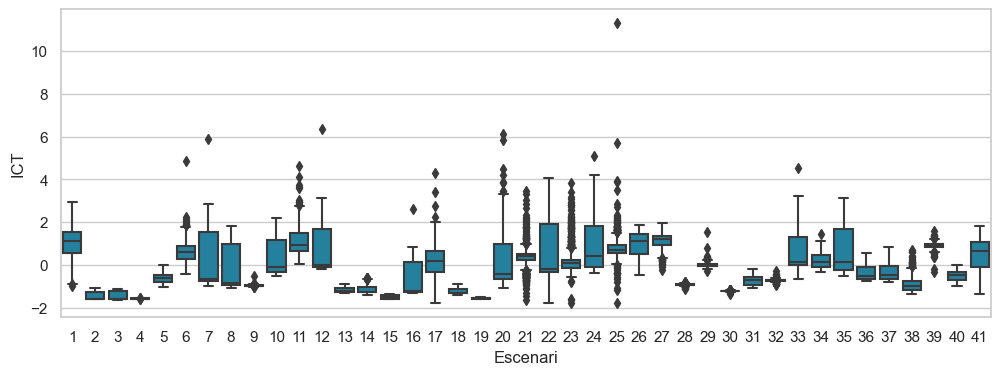

In [12]:
plt.figure(figsize=(12,4)) 
sns.boxplot(data=dataset, x="Escenari", y="ICT", color="#118AB2", )
ax = plt.gca()
# ax.set_yticks([i for i in range(-1, 13)])
"""
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates 
comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the 
dataset while the whiskers extend to show the rest of the distribution, except for points that are determined 
to be “outliers” using a method that is a function of the inter-quartile range.
"""
plt.show()

# Observem que les distribucions són les mateixes, però ara el rang de valors es compren entre -1.789976 i 11.30375

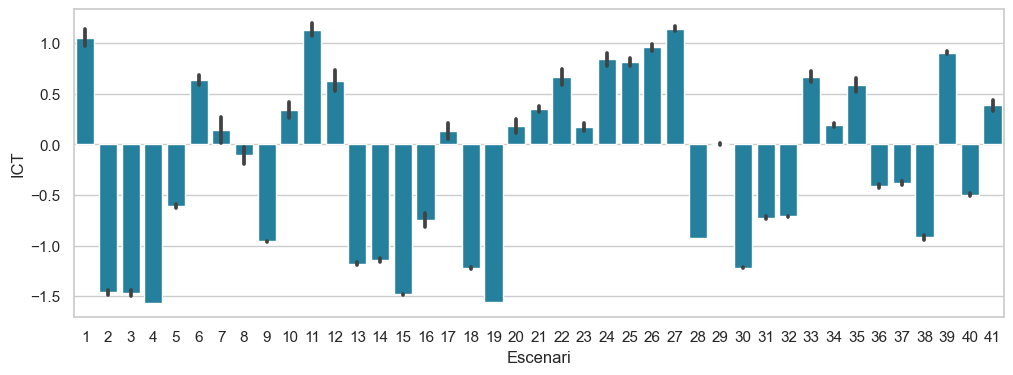

In [13]:
plt.figure(figsize=(12,4)) 
sns.barplot(data=dataset, x="Escenari", y="ICT", color="#118AB2")
ax = plt.gca()
# ax.set_yticks([i/2 for i in range(-1, 8)])
"""
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle 
and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in 
the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, 
and you want to make comparisons against it.
"""
plt.show()

# La tendència de la mitjana de cada escenari es troba aproximadament entre [-3/2, 1]. Això genera una bateria de valors
# molt ben centrats que ajudaran a classificar els escenaris amb més precissió. A més, veiem que la meitat de les vegades
# tenim tendències positives i l'altra meitat negatives, de valors variats